4. Suponga que desea utilizar Programación Genética para encontrar el diseño de un circuito
lógico, tome como, ejemplo el codificador de 7 segmentos. Describa el conjunto de
terminales, el conjunto de funciones y la función de aptitud. Use una librería de Python

El circuito a diseñar sera un 

# Decodificador 2 a 4:

En función de las combinaciones de las entradas dos entradas denominadas X0 y X1, solo se selecciona una de las cuatro salidas Y3, Y2, Y1, Y0.

Su tabal de verda es: 


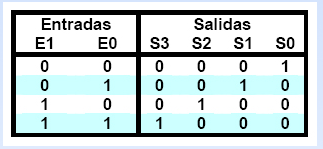
y sus funciones son:

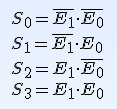

https://www.cienciasfera.com/materiales/tecnologia/tecno02/tema11/2_decodificadores.html

## Terminales
En este caso los terminales seran las hojas osea X0 y X1, que toman valores de verdadero y falso o 1 y 0.

## Funciones 

Las funciones seran los 3 operadores fundamentales AND, NOT Y OR, siendo los nodos de los arboles.

## Funcion aptitud 

Se puede usar la misma que se usa para valorar la aptitud del 7 segmentos, pues sigue la misma logica:

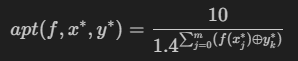

Iniciamos importando las librerias a utilizar:

In [55]:
import numpy as np
import random
import csv

Siguiendo el ejemplo del 7 segmentos leemos un archivo .CSV que contiene la tabla de verdad para el decodificador, y la guardamos en matrices

In [56]:

MatrizNumeros = np.zeros((4, 1))  # Inicializa una matriz de ceros de 4x1
MatrizEntradas = np.zeros((4, 2))  # Inicializa una matriz de ceros de 4x2
Salidas_esperadas = np.zeros((4, 4))  # Inicializa una matriz de ceros de 4x4
    
    # Abre el archivo CSV y lo lee
with open("Book1.csv", newline='') as file:
    Lectura = csv.reader(file, delimiter=';')  # Configura el lector de CSV
    next(Lectura)  # Salta la fila de encabezado

    # Itera a través de las filas del archivo CSV
    for i, fila in enumerate(Lectura):
        if i < 4:
            # Rellena las matrices con los valores del archivo CSV
            MatrizEntradas[i, :] = np.flip(np.array(fila[:2]))
            Salidas_esperadas[i, :] = np.array(fila[2:6])
            MatrizNumeros[i, 0] = np.array(fila[6])
    
# Devuelve las matrices convertidas a tipo booleano
Entradas=MatrizEntradas.astype(bool)
SalidasEs=Salidas_esperadas.astype(bool)
num = MatrizNumeros

Define una clase llamada Node para representar nodos de un árbol de expresiones lógicas.

In [57]:
class Node: 
    def __init__(self, Valor=None, Operacion=None):
        # Inicialización de un nodo con un valor y una operación (o ambas)
        self.left = None  # Nodo hijo izquierdo
        self.right = None  # Nodo hijo derecho
        self.Valor = Valor
        self.Operacion = Operacion

Funciones para Evaluar el Árbol y Obtener Etiquetas:

EvaluacionArbol(Nodo) evalúa un árbol de expresiones lógicas.
Etiquetar(Nodo) obtiene las etiquetas de los nodos en un recorrido en preorden.

In [58]:

# Función para evaluar un árbol de expresiones lógicas, evalua si es hoja o operacion.
def EvaluacionArbol(Nodo):
    if Nodo is None:
        return None

    if Nodo.Operacion is None:
        # Si el nodo es una hoja, retornar el valor binario (0 o 1)
        return Nodo.Valor[1]
    
    # Evaluar los hijos izquierdo y derecho
    left_result = EvaluacionArbol(Nodo.left)
    right_result = EvaluacionArbol(Nodo.right)

    if Nodo.Operacion == "NOT":
        # Operación NOT
        return not left_result
    elif Nodo.Operacion == "AND":
        # Operación AND
        return left_result and right_result
    elif Nodo.Operacion == "OR":
        # Operación OR
        return left_result or right_result
    else:
        # Si la operación no existe, lanzar un error
        raise ValueError("Operación no existe")

# Función para obtener las etiquetas de los nodos en un recorrido en preorden
def Etiquetar(Nodo):
    # Inicializamos una lista para almacenar las etiquetas
    Etiquetas = []
    # Creamos una pila e inicialmente agregamos el nodo raíz
    stack = [Nodo]

    # Mientras haya nodos en la pila, continuamos el bucle
    while stack:
        # Sacamos un nodo de la pila
        node = stack.pop()

        # Verificamos si el nodo no es None
        if node is not None:
            # Si tiene un valor, lo agregamos a las etiquetas
            if node.Valor is not None:
                Etiquetas.append(node.Valor[0])
            # Si tiene una operación, la agregamos a las etiquetas
            if node.Operacion is not None:
                Etiquetas.append(node.Operacion)
            
            # Agregamos los hijos del nodo a la pila (derecho primero para que se procese después)
            stack.append(node.right)
            stack.append(node.left)

    # Devolvemos la lista de etiquetas
    return Etiquetas

Construcción de un Árbol de Ejemplo:

In [59]:
Nodo = Node(Operacion="AND")
Nodo.left = Node(Valor=('X0', 1))
Nodo.right = Node(Valor=('X1', 1))


Generación de Ecucaciones y Comprobación:
Se Añaden las ecuaciones corectas para comprobar que la funcion actitud esta bien.

In [60]:

# Obtener la lista de etiquetas en recorrido en preorden
Etiquetas_preorden = Etiquetar(Nodo)

# Imprimir la lista de etiquetas
print("Labels in preorder:", Etiquetas_preorden)

# Evaluar el árbol
Resultado = EvaluacionArbol(Nodo)

# Imprimir el resultado
print("Resultado:", int(Resultado))

#Generamos las ecuaciones para la salida.
ValoresSalida = [[] for _ in range(4)]

for input in Entradas:
    
    root_out3 = Node(Operacion="AND")
    root_out3.left = Node(Valor=('X0', input[0]))
    root_out3.right = Node(Valor=('X1', input[1]))

    ValoresSalida[3].append(EvaluacionArbol(root_out3))
    root_out2 = Node(Operacion="AND")
    root_out2.left = Node(Operacion="NOT")
    root_out2.left.left = Node(Valor=('X0', input[0]))
    root_out2.right = Node(Valor=('X1', input[1]))

    ValoresSalida[2].append(EvaluacionArbol(root_out2))

    root_out1 = Node(Operacion="AND")
    root_out1.left = Node(Valor=('X0', input[0]))
    root_out1.right = Node(Operacion="NOT")
    root_out1.right.left = Node(Valor=('X1', input[1]))

    ValoresSalida[1].append(EvaluacionArbol(root_out1))

    root_out0 = Node(Operacion="AND")
    root_out0.left = Node(Operacion="NOT")
    root_out0.left.left = Node(Valor=('X0', input[0]))
    root_out0.right = Node(Operacion="NOT")
    root_out0.right.left = Node(Valor=('X1', input[1]))

    ValoresSalida[0].append(EvaluacionArbol(root_out0))

#Comprobamos estan bien
# Encabezados
print(f'X0 X1 Y3 Y2 Y1 Y0')

# Imprimir filas de datos
for fila in range(4):
    entrada_I0 = int(Entradas[fila][0])
    entrada_I1 = int(Entradas[fila][1])
    valores_salida = [int(ValoresSalida[i][fila]) for i in range(3, -1, -1)]

    print(f'{entrada_I0}  {entrada_I1} {" ".join(map(str, valores_salida))}')


Labels in preorder: ['AND', 'X0', 'X1']
Resultado: 1
X0 X1 Y3 Y2 Y1 Y0
0  0 0 0 0 1
1  0 0 0 1 0
0  1 0 1 0 0
1  1 1 0 0 0


Función de Aptitud (FuncionAptitud): Calcula la aptitud de los resultados de salida comparados con los resultados esperados, siendo 10 mucha aptitud y 0 nada de aptitud, comprobamos a su ves que funciona.

In [61]:
def FuncionAptitud(SalidasEs, ValoresSalida):
    # Se inicializa una matriz 'Aptitud' de 1 fila y 4 columnas con valores de punto flotante iguales a cero.
    Aptitud = np.zeros((1,4), float)
    
    # Se itera sobre las cuatro posiciones.
    for i in range(4):
        # Se crea una nueva lista 'Esperadas' que contiene los resultados de salida esperados en orden inverso.
        Esperadas = [out[i] for out in SalidasEs[::-1]]
        
        # Se calcula una puntuación de aptitud basada en la comparación entre los resultados esperados y los obtenidos.
        Aptitud[0,i] = (10/1.4**sum(list(map(lambda x, y: x^y, Esperadas, ValoresSalida[i]))))
    
    # Se devuelve la matriz 'Aptitud' que contiene las puntuaciones de aptitud para cada posición.
    return Aptitud

#comprobamos aptitude
print(FuncionAptitud(SalidasEs, ValoresSalida))

[[10. 10. 10. 10.]]


Creación Aleatoria de Programas y Asignación de Valores: Se definen funciones para crear programas aleatorios y asignarles valores de entrada.

In [62]:
def CrearProgramaAleatorio():
    # Definimos las posibles operaciones
    operaciones = ["AND", "OR", "NOT"]

    # Elegimos aleatoriamente una operación
    operacion = random.choice(operaciones)

    if operacion == "NOT":
        Nodo = Node()
        Nodo.Operacion = operacion
        Nodo.left = SubprogramaAleatorio()
        return Nodo
    else:
        Nodo = Node()
        Nodo.Operacion = operacion
        Nodo.left = SubprogramaAleatorio()
        Nodo.right = SubprogramaAleatorio()
        return Nodo

# Función para crear un subprograma aleatorio
def SubprogramaAleatorio():
    if random.random() < 0.7:  # 70% de probabilidad de crear un terminal (hoja)
        variable = random.choice(['X0', 'X1'])  # Elige aleatoriamente una variable
        return Node(Valor=(variable, None))  # Asigna None como valor inicial
    else:
        subprogram = Node()  # Crea un nodo subprograma vacío
        subprogram.Operacion = random.choice(["AND", "OR", "NOT"])  # Asigna una operación aleatoria al subprograma
        subprogram.left = SubprogramaAleatorio()  # Crea un subprograma aleatorio para el hijo izquierdo
        subprogram.right = SubprogramaAleatorio()  # Crea un subprograma aleatorio para el hijo derecho
        return subprogram

# Función para asignar valores de entrada a un programa
def AsignarVaores(programa, DatosEntrada):
    # Definimos el caso base: si el programa es None, terminamos la recursión
    if programa is None:
        return

    # Primero, asignamos valores a los hijos izquierdo y derecho
    AsignarVaores(programa.left, DatosEntrada)
    AsignarVaores(programa.right, DatosEntrada)

    # Después, verificamos si el nodo actual tiene una variable
    if programa.Valor is not None:
        variable = programa.Valor[0]
        if variable == 'X0':
            programa.Valor = ('X0', DatosEntrada[0])
        elif variable == 'X1':
            programa.Valor = ('X1', DatosEntrada[1])


Generación de una Población Inicial de Programas:

In [63]:
TamañoPoblacion = 15  # Ajusta el tamaño de la población según sea necesario

# Genera la población inicial de programas
PoblacionInicial = [CrearProgramaAleatorio() for _ in range(TamañoPoblacion)]

# Asigna valores de entrada a las variables en cada programa
ValoresSalida = [[[] for _ in range(4)] for i in range(15)]

Asignación de Valores de Entrada a Programas y Evaluación: Asigna valores de entrada a los programas y evalúa sus resultados.

In [64]:
for idx, DatosEntrada in enumerate(Entradas):
    print(f"\nDatos de entrada {idx + 1}: {DatosEntrada}\n")
    for programa in PoblacionInicial:
        AsignarVaores(programa, DatosEntrada)
    # Imprime la población inicial
    for i, programa in enumerate(PoblacionInicial):
        print(f"Individuo {i + 1}:")
        print(Etiquetar(programa))
        evaluacion = EvaluacionArbol(programa)
        if evaluacion:
            print("La evaluacion es correcta")
        else:
            print("La evaluacion es incorrecta")

        ValoresSalida[i-1][idx] = EvaluacionArbol(programa)



Datos de entrada 1: [False False]

Individuo 1:
['OR', 'NOT', 'X0', 'NOT', 'X1', 'X1', 'X0']
La evaluacion es correcta
Individuo 2:
['NOT', 'X1']
La evaluacion es correcta
Individuo 3:
['AND', 'NOT', 'X1', 'X0', 'X0']
La evaluacion es incorrecta
Individuo 4:
['OR', 'X0', 'X1']
La evaluacion es incorrecta
Individuo 5:
['OR', 'X1', 'X1']
La evaluacion es incorrecta
Individuo 6:
['NOT', 'X0']
La evaluacion es correcta
Individuo 7:
['NOT', 'X1']
La evaluacion es correcta
Individuo 8:
['NOT', 'X0']
La evaluacion es correcta
Individuo 9:
['AND', 'X0', 'X0']
La evaluacion es incorrecta
Individuo 10:
['AND', 'X0', 'X1']
La evaluacion es incorrecta
Individuo 11:
['OR', 'X0', 'X0']
La evaluacion es incorrecta
Individuo 12:
['NOT', 'NOT', 'NOT', 'X0', 'X0', 'X0']
La evaluacion es correcta
Individuo 13:
['AND', 'X0', 'OR', 'X0', 'X1']
La evaluacion es incorrecta
Individuo 14:
['NOT', 'AND', 'X1', 'OR', 'X1', 'NOT', 'NOT', 'NOT', 'X1', 'X0', 'NOT', 'X0', 'OR', 'X1', 'AND', 'X0', 'X0', 'X1']
La eva

Cálculo de Aptitud para la Población:

In [65]:
print(FuncionAptitud(SalidasEs, ValoresSalida))

[[ 7.14285714 10.          5.10204082  7.14285714]]
